In [1]:
#モジュールの読み込み
from __future__ import print_function

import pandas as pd
from pandas import Series,DataFrame

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam


Using TensorFlow backend.


In [2]:
#CSVファイルの読み込み
data_set = pd.read_csv("data.csv",sep=",",header=0)

#data_set.head(3)

,time,country,case,cure,death,longitude,latitude
0,2020/1/23,Afghanistan,0,0,0,66.004734,33.835231
1,2020/1/23,Albania,0,0,0,20.049834,41.142450
2,2020/1/23,Algeria,0,0,0,2.617323,28.158938


In [3]:
#time をone hotラベルに

import category_encoders as ce

# Eoncodeしたい列をリストで指定。もちろん複数指定可能。
list_cols = ['time']

# OneHotEncodeしたい列を指定。Nullや不明の場合の補完方法も指定。
#ce_ohe = ce.OneHotEncoder(cols=list_cols,handle_unknown='impute')
ce_oe = ce.OrdinalEncoder(cols=list_cols,handle_unknown='impute')

# pd.DataFrameをそのまま突っ込む
df_session_ce_ordinal = ce_oe.fit_transform(data_set)

#df_session_ce_ordinal.head(350)

,time,country,case,cure,death,longitude,latitude
0,1,Afghanistan,0,0,0,66.004734,33.835231
1,1,Albania,0,0,0,20.049834,41.142450
2,1,Algeria,0,0,0,2.617323,28.158938
3,1,Andorra,0,0,0,1.560544,42.542291
4,1,Angola,0,0,0,17.537368,-12.293361
...,...,...,...,...,...,...,...
345,3,Aruba,0,0,0,-69.982677,12.520880
346,3,Australia,0,0,0,134.491000,-25.732887
347,3,Austria,0,0,0,14.126476,47.585494
348,3,Azerbaijan,0,0,0,47.545999,40.288272


In [4]:
#print(df_session_ce_ordinal.columns.values)

['time' 'country' 'case' 'cure' 'death' 'longitude' 'latitude']


In [28]:

# データの分割
(train, test) = train_test_split(df_session_ce_ordinal, test_size=0.2, shuffle=True)

#x_train = train.ix[:,['time','latitude','longitude']]

data_set.columns = ['time','country','case','cure','death','longitude','latitude']
#   X = df.loc[:,'v1':'a3']
#    y = df['loss']
    
def norm(x):
    mean = np.mean(x)
    std = np.std(x)
    return (x - mean) / std

x_train = train.loc[:, ['time','longitude','latitude']]
y_train = train.loc[:, ['case','cure','death']]
#y_train = train.loc[:, ['case']]

x_train = norm(x_train)
y_train = norm(y_train)

x_test = test.loc[:, ['time','longitude','latitude']]
y_test = test.loc[:, ['case','cure','death']]
#y_test = test.loc[:, ['case']]

x_test = norm(x_test)
y_test = norm(y_test)

#データの整形
x_train = x_train.astype(np.float)
x_test = x_test.astype(np.float)

y_train = y_train.astype(np.float)
y_test = y_test.astype(np.float)

In [40]:
#x_train

,time,longitude,latitude
11429,1.196146,-1.256652,-0.061960
1595,-1.319715,2.079145,0.717417
1636,-1.319715,2.198190,-1.055404
4563,-0.552164,1.692496,-0.613417
1661,-1.319715,-0.074358,1.087846
...,...,...,...
11257,1.153504,0.122064,0.860274
7825,0.258028,1.609150,-0.642785
3328,-0.893298,0.134335,0.984174
1268,-1.404999,-0.052344,1.101480


In [41]:
#y_train

,case,cure,death
11429,-0.147339,-0.102709,-0.109812
1595,-0.138857,-0.102709,-0.109812
1636,-0.147339,-0.102709,-0.109812
4563,-0.147339,-0.102709,-0.109812
1661,-0.147339,-0.102709,-0.109812
...,...,...,...
11257,-0.128678,-0.057097,-0.092668
7825,-0.116803,-0.102709,-0.109812
3328,-0.147339,-0.102709,-0.109812
1268,-0.147339,-0.102709,-0.109812




-----------------------------
層数：3, ノード数:600
Train on 10886 samples, validate on 2722 samples
Epoch 1/100
10886/10886 [==============================] - 2s 140us/step - loss: 0.7861 - mean_absolute_error: 0.1336 - val_loss: 0.3905 - val_mean_absolute_error: 0.1344
Epoch 2/100
10886/10886 [==============================] - 1s 73us/step - loss: 0.2557 - mean_absolute_error: 0.1195 - val_loss: 0.1973 - val_mean_absolute_error: 0.1338
Epoch 3/100
10886/10886 [==============================] - 1s 74us/step - loss: 0.1578 - mean_absolute_error: 0.1190 - val_loss: 0.1551 - val_mean_absolute_error: 0.1334
Epoch 4/100
10886/10886 [==============================] - 1s 74us/step - loss: 0.1337 - mean_absolute_error: 0.1193 - val_loss: 0.1433 - val_mean_absolute_error: 0.1344
Epoch 5/100
10886/10886 [==============================] - 1s 75us/step - loss: 0.1257 - mean_absolute_error: 0.1193 - val_loss: 0.1381 - val_mean_absolute_error: 0.1336
Epoch 6/100
10886/10886 [============================

Epoch 96/100
10886/10886 [==============================] - 1s 76us/step - loss: 0.1193 - mean_absolute_error: 0.1187 - val_loss: 0.1352 - val_mean_absolute_error: 0.1347
Epoch 97/100
10886/10886 [==============================] - 1s 75us/step - loss: 0.1193 - mean_absolute_error: 0.1188 - val_loss: 0.1348 - val_mean_absolute_error: 0.1343
Epoch 98/100
10886/10886 [==============================] - 1s 74us/step - loss: 0.1192 - mean_absolute_error: 0.1187 - val_loss: 0.1342 - val_mean_absolute_error: 0.1337
Epoch 99/100
10886/10886 [==============================] - 1s 77us/step - loss: 0.1193 - mean_absolute_error: 0.1188 - val_loss: 0.1353 - val_mean_absolute_error: 0.1348
Epoch 100/100
2722/2722 [==============================] - 0s 66us/step


Test loss: 0.13390401563991045
Test mean_absolute_error 0.13340361416339874


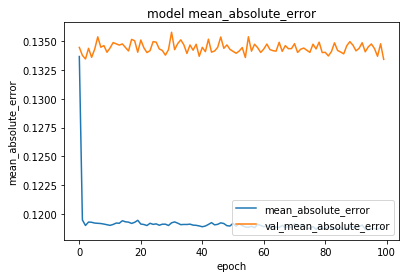

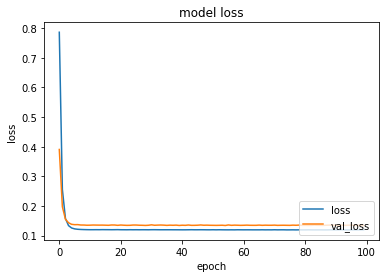



-----------------------------
層数：3, ノード数:600
Train on 10886 samples, validate on 2722 samples
Epoch 1/100
10886/10886 [==============================] - 2s 156us/step - loss: 0.7612 - mean_absolute_error: 0.1347 - val_loss: 0.3631 - val_mean_absolute_error: 0.1353
Epoch 2/100
10886/10886 [==============================] - 1s 78us/step - loss: 0.2353 - mean_absolute_error: 0.1192 - val_loss: 0.1859 - val_mean_absolute_error: 0.1348
Epoch 3/100
10886/10886 [==============================] - 1s 71us/step - loss: 0.1499 - mean_absolute_error: 0.1191 - val_loss: 0.1509 - val_mean_absolute_error: 0.1338
Epoch 4/100
10886/10886 [==============================] - 1s 71us/step - loss: 0.1310 - mean_absolute_error: 0.1195 - val_loss: 0.1418 - val_mean_absolute_error: 0.1343
Epoch 5/100
10886/10886 [==============================] - 1s 71us/step - loss: 0.1245 - mean_absolute_error: 0.1190 - val_loss: 0.1376 - val_mean_absolute_error: 0.1338
Epoch 6/100
10886/10886 [============================

KeyboardInterrupt: 

In [39]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers


#ニューラルネットワークの実装
model = Sequential()

model.add(Dense(600, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001),input_shape=(3,)))
#model.add(Dropout(0.1))

model.add(Dense(600, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(3,)))
#model.add(Dropout(0.1))

model.add(Dense(600, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(3,)))
#model.add(Dropout(0.1))

model.add(Dense(3, activation='linear'))




model.summary()
print("\n")

#ニューラルネットワークの実装②
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])


early_stopping = EarlyStopping(
                        monitor='val_loss',
                        min_delta=0.0,
                        patience=50,
                )

# val_lossの改善が2エポック見られなかったら、学習率を0.5倍する。
reduce_lr = ReduceLROnPlateau(
                        monitor='val_loss',
                        factor=0.7,
                        patience=20,
                        min_lr=0.001
                )

#ニューラルネットワークの学習
history = model.fit(x_train, y_train,batch_size=200,epochs=100,verbose=1,validation_data=(x_test, y_test),callbacks=[early_stopping, reduce_lr])

#ニューラルネットワークの推論
score = model.evaluate(x_test,y_test,verbose=1)
print("\n")
print("Test loss:",score[0])
print("Test mean_squared_error",score[1])



#学習履歴のグラフ化に関する参考資料
#http://aidiary.hatenablog.com/entry/20161109/1478696865


def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['val_mean_squared_error'])
    plt.title('model mean_squared_error')
    plt.xlabel('epoch')
    plt.ylabel('mean_squared_error')
    plt.legend(['mean_squared_error', 'val_mean_squared_error'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(history)

#モデルの概要を表示
#model.summary()



In [1]:
import subprocess
subprocess.run(['jupyter', 'nbconvert', '--to', 'script', '*.ipynb'])

CompletedProcess(args=['jupyter', 'nbconvert', '--to', 'script', '*.ipynb'], returncode=0)

In [ ]:
for i in range(3):
    for j in range(5):
        
        param1 = int((j+1) * 200)
        
        
        if i == 0:
            
            #ニューラルネットワークの実装
            model = Sequential()

            model.add(Dense(param1, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(3,)))
            #model.add(Dropout(0.1))

            model.add(Dense(param1, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(3,)))
            #model.add(Dropout(0.1))

            model.add(Dense(3, activation='linear'))

        if i == 1:
            
            #ニューラルネットワークの実装
            model = Sequential()

            model.add(Dense(param1, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001),input_shape=(3,)))
            #model.add(Dropout(0.1))

            model.add(Dense(param1, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(3,)))
            #model.add(Dropout(0.1))

            model.add(Dense(param1, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(3,)))
            #model.add(Dropout(0.1))

            model.add(Dense(3, activation='linear'))


        if i == 2:
            
            #ニューラルネットワークの実装
            model = Sequential()

            model.add(Dense(param1, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001),input_shape=(3,)))
            #model.add(Dropout(0.1))

            model.add(Dense(param1, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001),input_shape=(3,)))
            #model.add(Dropout(0.1))

            model.add(Dense(param1, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(3,)))
            #model.add(Dropout(0.1))
            
            model.add(Dense(param1, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(3,)))
            #model.add(Dropout(0.1))

            model.add(Dense(3, activation='linear'))

        
            

In [ ]:
import GPy, GPyOpt
from bayes_opt import BayesianOptimization

def bayesOpt():
    pbounds = [{'name': 'validation_split', 'type': 'continuous',  'domain': (0.0, 0.3)},
          {'name': 'l1_drop',          'type': 'continuous',  'domain': (0.0, 0.3)},
          {'name': 'l2_drop',          'type': 'continuous',  'domain': (0.0, 0.3)},
          {'name': 'l1_out',           'type': 'discrete',    'domain': (64, 128, 256, 512, 1024)},
          {'name': 'l2_out',           'type': 'discrete',    'domain': (64, 128, 256, 512, 1024)},
          {'name': 'batch_size',       'type': 'discrete',    'domain': (10, 100, 500)},
          {'name': 'epochs',           'type': 'discrete',    'domain': (5, 10, 50)}]
    optimizer = BayesianOptimization(f=model, pbounds=pbounds)
    optimizer.maximize(init_points=5, n_iter=10, acq='ucb')
    return optimizer


#ベイズ最適化の実行
result = bayesOpt()
 
result.res